1) Importing Housing Prices Dataset and showing some basic info about that dataset

In [1]:
import pandas as pd

df = pd.read_csv('/content/housingdata.csv')


In [5]:
# Rename columns appropriately
df.columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

*Showing basic info

In [2]:
print("Dataset Info:")
print(df.info())

print("\nFirst 5 Rows:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0.00632  505 non-null    float64
 1   18       505 non-null    float64
 2   2.31     505 non-null    float64
 3   0        505 non-null    int64  
 4   0.538    505 non-null    float64
 5   6.575    505 non-null    float64
 6   65.2     505 non-null    float64
 7   4.09     505 non-null    float64
 8   1        505 non-null    int64  
 9   296      505 non-null    int64  
 10  15.3     505 non-null    float64
 11  396.9    505 non-null    float64
 12  4.98     505 non-null    float64
 13  24       505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB
None

First 5 Rows:
   0.00632   18  2.31  0  0.538  6.575  65.2    4.09  1  296  15.3   396.9  \
0  0.02731  0.0  7.07  0  0.469  6.421  78.9  4.9671  2  242  17.8  396.90   
1  0.02729  0.0  7.07  0  0.469  7.185  61.1 

2) Visualizing the Correlation of the Dataset

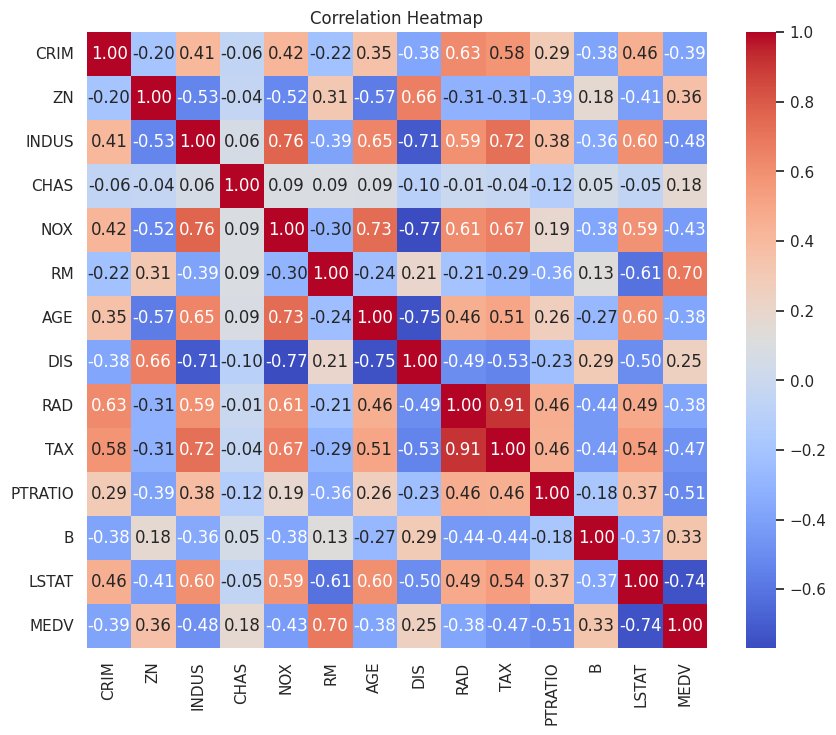

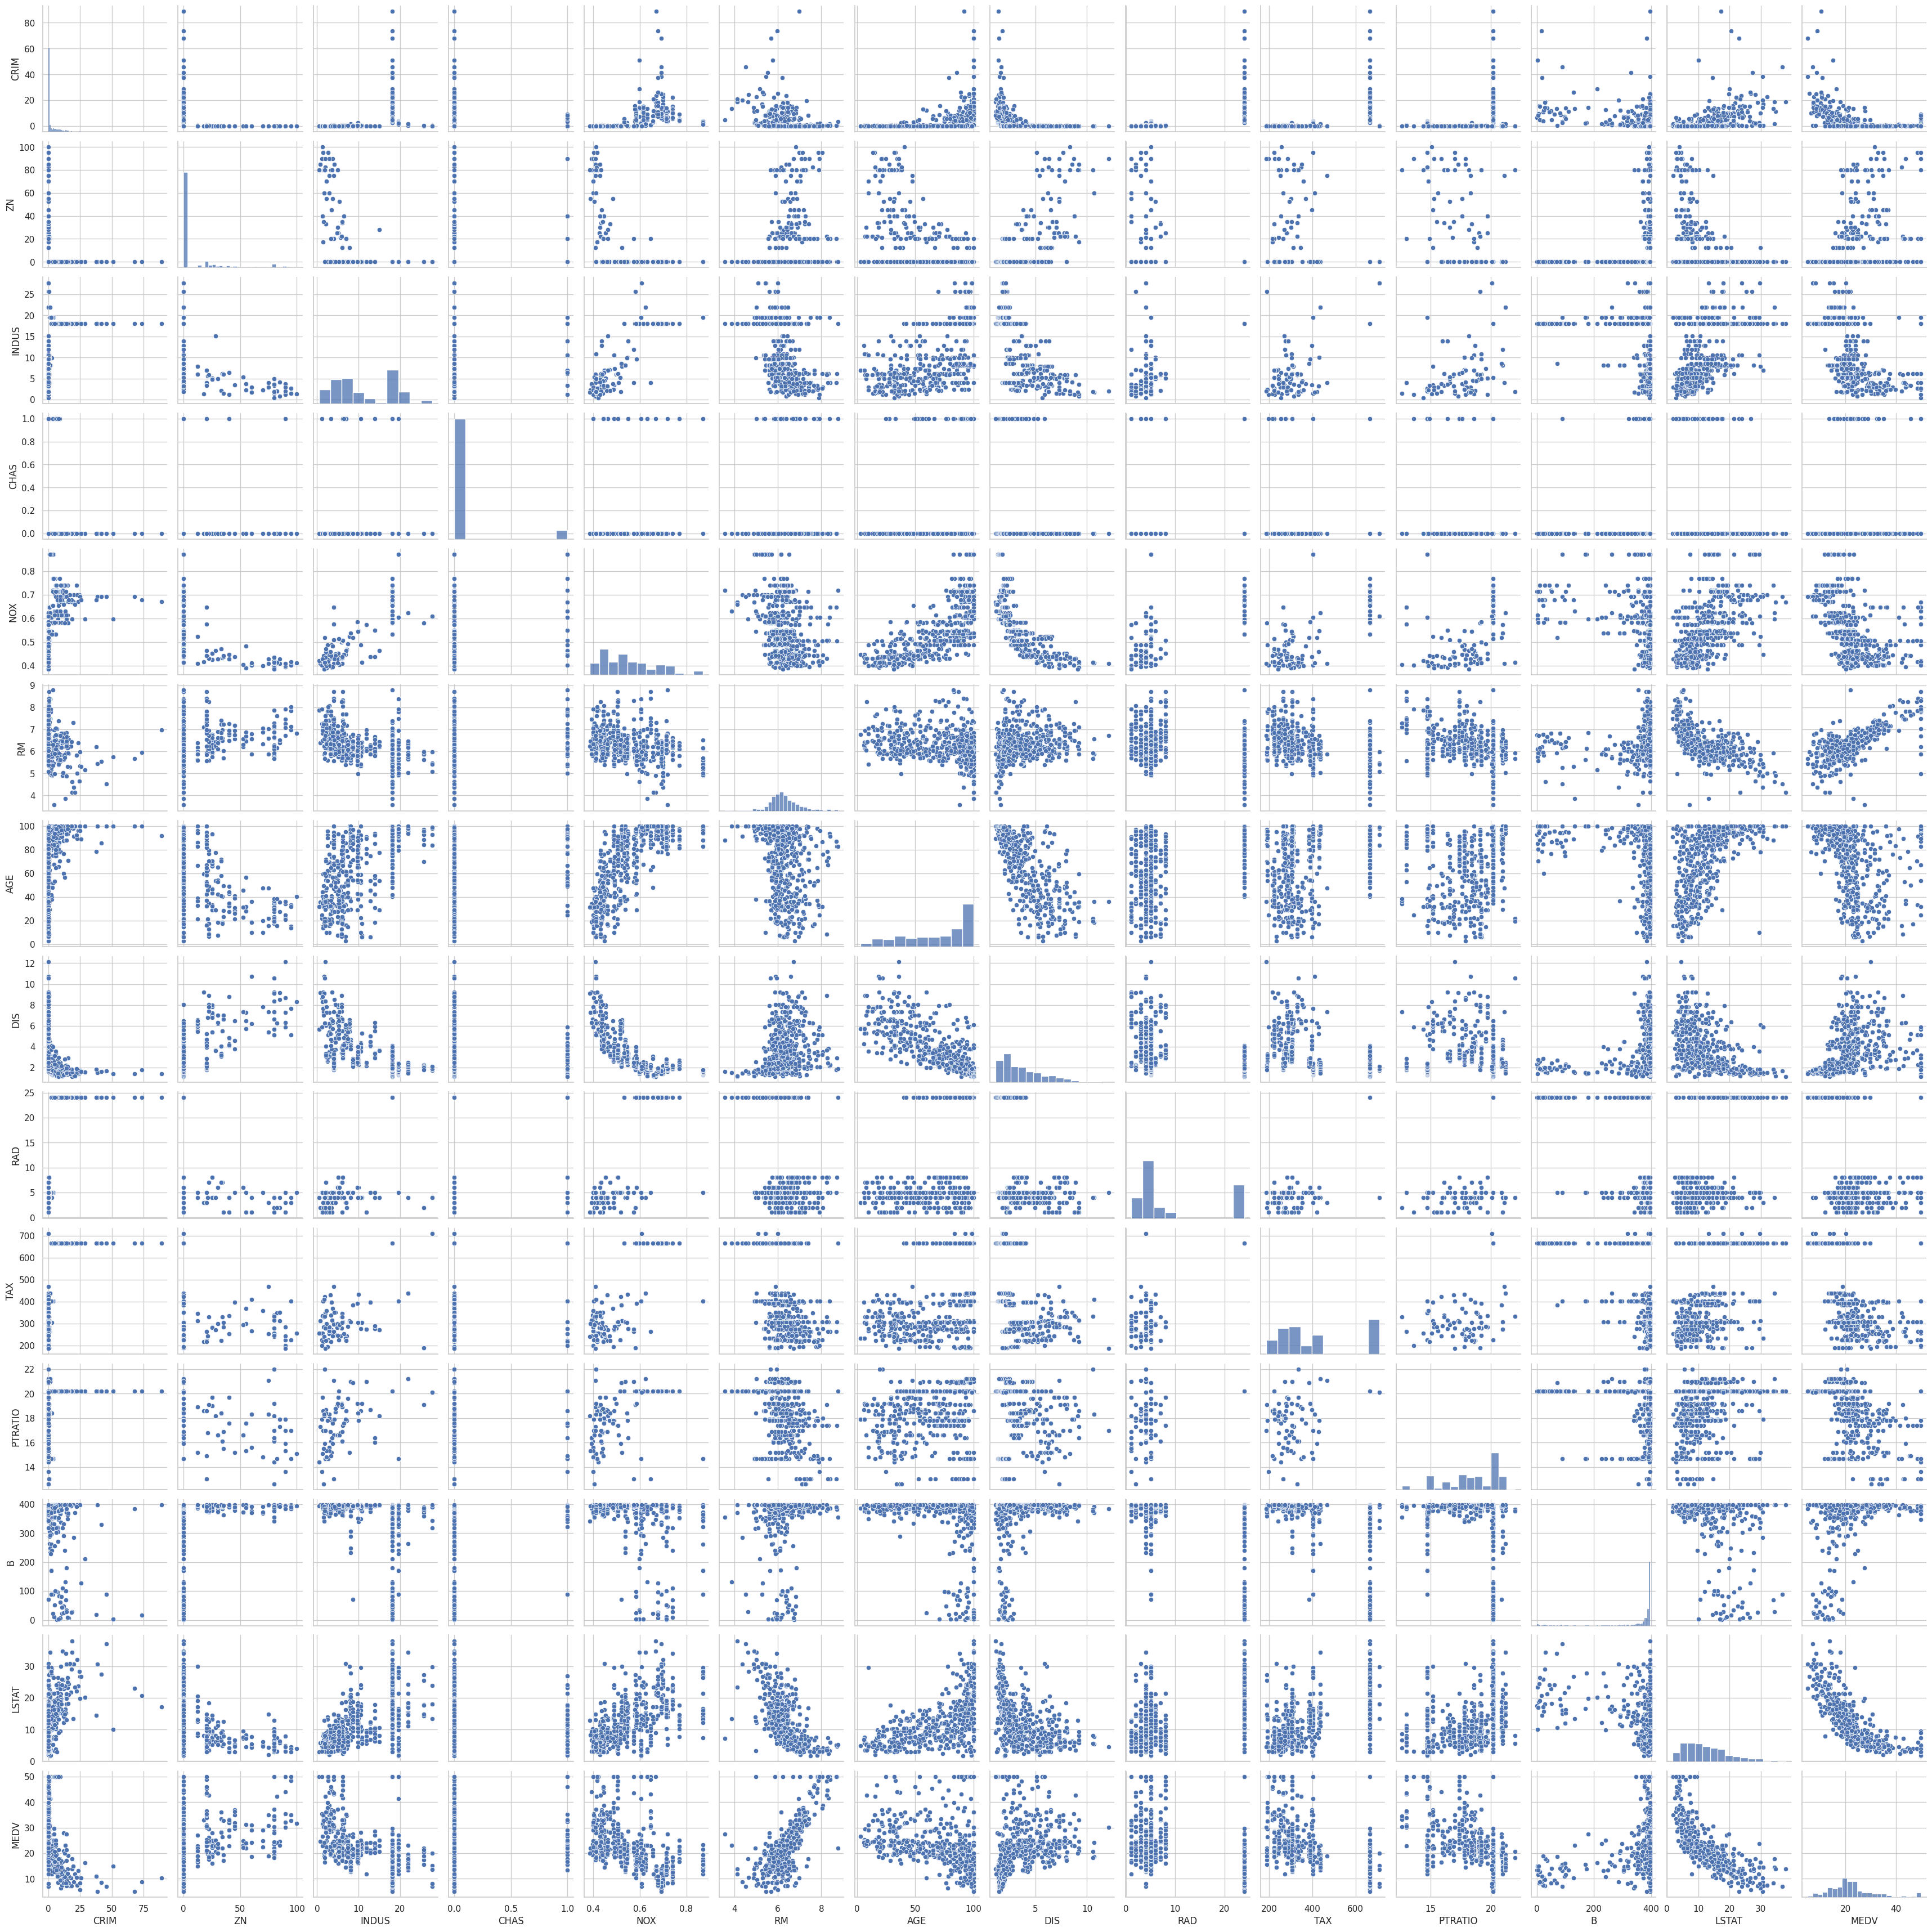

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

sns.pairplot(df)
plt.show()

3) Data Preprocessing

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Define features and target

In [19]:
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

Split data into training (80%) and testing (20%) sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4) Building a prediction-based model using the pipeline mentioned in the class

In [13]:
# Create a pipeline with feature scaling and linear regression
regression_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])


Train the model

In [21]:
regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

Predict on the test set

In [22]:
y_pred = regression_pipeline.predict(X_test)

Evaluate the model

In [23]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


Print model performance

In [24]:
print("Model Performance:\n")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Performance:

Mean Absolute Error (MAE): 3.19
Mean Squared Error (MSE): 19.38
R² Score: 0.65
